# **How to use the Python programming Language for Time Series Analysis!**

This work was prepared together with [Gul Bulut](https://www.kaggle.com/gulyvz) and [Bulent Siyah](https://www.kaggle.com/bulentsiyah/). **The whole study consists of two parties**
* [Time Series Forecasting and Analysis- Part 1](https://www.kaggle.com/gulyvz/time-series-forecasting-and-analysis-part-1)
* [Time Series Forecasting and Analysis- Part 2](https://www.kaggle.com/bulentsiyah/time-series-forecasting-and-analysis-part-2)

This kernel will teach you everything you need to know to use Python for forecasting time series data to predict new future data points.

![](https://iili.io/JaZxFS.png)

we'll learn about state of the art Deep Learning techniques with Recurrent Neural Networks that use deep learning to forecast future data points.

![](https://iili.io/JaZCMl.png)


This kernel even covers Facebook's Prophet library, a simple to use, yet powerful Python library developed to forecast into the future with time series data.

![](https://iili.io/JaZnP2.png)

# **Content Part 1** 

1. [How to Work with Time Series Data with Pandas](https://www.kaggle.com/gulyvz/time-series-forecasting-and-analysis-part-1#1.)
1. [Use Statsmodels to Analyze Time Series Data](https://www.kaggle.com/gulyvz/time-series-forecasting-and-analysis-part-1#2.)
1. [General Forecasting Models - ARIMA(Autoregressive Integrated Moving Average)](https://www.kaggle.com/gulyvz/time-series-forecasting-and-analysis-part-1#3.)
1. [General Forecasting Models - SARIMA(Seasonal Autoregressive Integrated Moving Average)](https://www.kaggle.com/gulyvz/time-series-forecasting-and-analysis-part-1#4.)
1. [General Forecasting Models - SARIMAX](https://www.kaggle.com/gulyvz/time-series-forecasting-and-analysis-part-1#5.)

# **Content Part 2**

1. [Deep Learning for Time Series Forecasting - (RNN)](#1.)
1. [Multivariate Time Series with RNN](#2.)
1. [Use Facebook's Prophet Library for forecasting](#3.)


<a class="anchor" id="1."></a> 
# 1.Deep Learning for Time Series Forecasting - (RNN)

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/kaggle/input/for-simple-exercises-time-series-forecasting/Alcohol_Sales.csv',index_col='DATE',parse_dates=True)
df.index.freq = 'MS'
df.head()

,S4248SM144NCEN
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


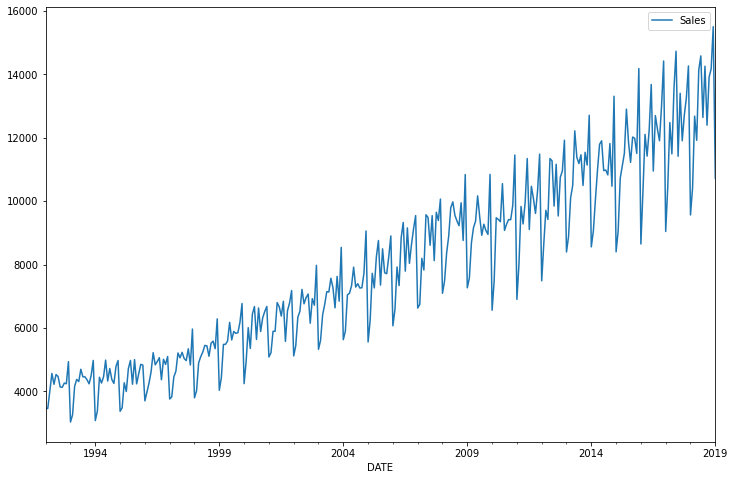

In [3]:
df.columns = ['Sales']
df.plot(figsize=(12,8))

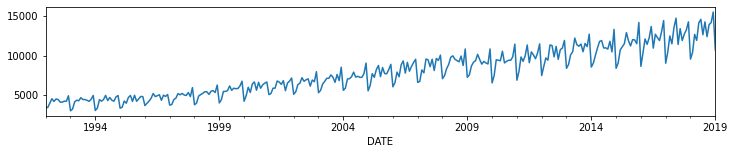

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose

results = seasonal_decompose(df['Sales'])
results.observed.plot(figsize=(12,2))

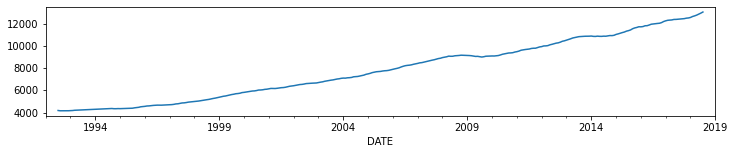

In [5]:
results.trend.plot(figsize=(12,2))

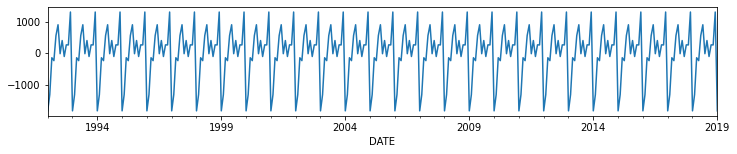

In [6]:
results.seasonal.plot(figsize=(12,2))

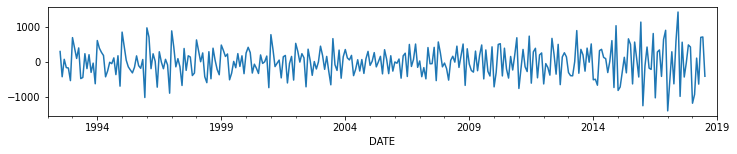

In [7]:
results.resid.plot(figsize=(12,2))

## Train Test Split

In [8]:
print("len(df)", len(df))

train = df.iloc[:313]
test = df.iloc[313:]


print("len(train)", len(train))
print("len(test)", len(test))

len(df) 325
len(train) 313
len(test) 12


## Scale Data

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# IGNORE WARNING ITS JUST CONVERTING TO FLOATS
# WE ONLY FIT TO TRAININ DATA, OTHERWISE WE ARE CHEATING ASSUMING INFO ABOUT TEST SET
scaler.fit(train)


MinMaxScaler(copy=True, feature_range=(0, 1))

In [10]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

## Time Series Generator

This class takes in a sequence of data-points gathered at
equal intervals, along with time series parameters such as
stride, length of history, etc., to produce batches for
training/validation.

In [11]:
from keras.preprocessing.sequence import TimeseriesGenerator
scaled_train[0]

Using TensorFlow backend.


array([0.03658432])

In [12]:
# define generator
n_input = 2
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

print('len(scaled_train)',len(scaled_train))
print('len(generator)',len(generator))  # n_input = 2

len(scaled_train) 313
len(generator) 311


In [13]:
# What does the first batch look like?
X,y = generator[0]

print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.03658432 0.03649885]
Predict this y: 
 [[0.08299855]]


In [14]:
# Let's redefine to get 12 months back and then predict the next month out
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

# What does the first batch look like?
X,y = generator[0]

print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.03658432 0.03649885 0.08299855 0.13103684 0.1017181  0.12804513
 0.12266006 0.09453799 0.09359774 0.10496624 0.10334217 0.16283443]
Predict this y: 
 [[0.]]


## Create the Model

In [15]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [16]:
# fit model
model.fit_generator(generator,epochs=50)

Epoch 1/50
301/301 [==============================] - 2s 7ms/step - loss: 0.0170
Epoch 2/50
301/301 [==============================] - 2s 5ms/step - loss: 0.0085
Epoch 3/50
301/301 [==============================] - 2s 5ms/step - loss: 0.0088
Epoch 4/50
301/301 [==============================] - 2s 5ms/step - loss: 0.0072
Epoch 5/50
301/301 [==============================] - 2s 5ms/step - loss: 0.0061
Epoch 6/50
301/301 [==============================] - 2s 6ms/step - loss: 0.0050
Epoch 7/50
301/301 [==============================] - 2s 5ms/step - loss: 0.0043
Epoch 8/50
301/301 [==============================] - 2s 5ms/step - loss: 0.0036
Epoch 9/50
301/301 [==============================] - 2s 5ms/step - loss: 0.0030
Epoch 10/50
301/301 [==============================] - 2s 5ms/step - loss: 0.0026
Epoch 11/50
301/301 [==============================] - 2s 5ms/step - loss: 0.0021
Epoch 12/50
301/301 [==============================] - 2s 5ms/step - loss: 0.0021
Epoch 13/50
301/301 [====

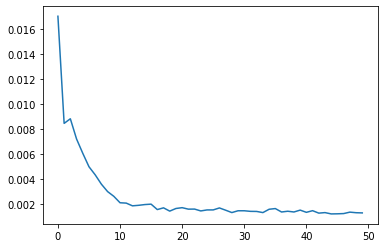

In [17]:
model.history.history.keys()
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

## Evaluate on Test Data

In [18]:
first_eval_batch = scaled_train[-12:]
first_eval_batch

array([[0.63432772],
       [0.80776135],
       [0.72313873],
       [0.89870929],
       [1.        ],
       [0.71672793],
       [0.88648602],
       [0.75869732],
       [0.82742115],
       [0.87443371],
       [0.96025301],
       [0.5584238 ]])

In [19]:
first_eval_batch = first_eval_batch.reshape((1, n_input, n_features))
model.predict(first_eval_batch)

array([[0.6874868]], dtype=float32)

In [20]:
scaled_test[0]

array([0.63116506])

In [21]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)
    
test_predictions

[array([0.6874868], dtype=float32),
 array([0.8057986], dtype=float32),
 array([0.7580665], dtype=float32),
 array([0.923397], dtype=float32),
 array([0.9962742], dtype=float32),
 array([0.75279814], dtype=float32),
 array([0.9047118], dtype=float32),
 array([0.77618504], dtype=float32),
 array([0.8549177], dtype=float32),
 array([0.8928125], dtype=float32),
 array([0.9670736], dtype=float32),
 array([0.5747522], dtype=float32)]

In [22]:
scaled_test

array([[0.63116506],
       [0.82502778],
       [0.75972305],
       [0.94939738],
       [0.98743482],
       [0.82135225],
       [0.95956919],
       [0.80049577],
       [0.93025045],
       [0.95247457],
       [1.0661595 ],
       [0.65706471]])

## Inverse Transformations and Compare

In [23]:
true_predictions = scaler.inverse_transform(test_predictions)
true_predictions

array([[11073.90839344],
       [12458.03770655],
       [11899.6196956 ],
       [13833.82155687],
       [14686.41155297],
       [11837.98544043],
       [13615.22314852],
       [12111.58873272],
       [13032.68223149],
       [13476.01332593],
       [14344.79427296],
       [ 9755.02612317]])

In [24]:
test['Predictions'] = true_predictions
test

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Sales,Predictions
DATE,,
2018-02-01,10415,11073.908393
2018-03-01,12683,12458.037707
2018-04-01,11919,11899.619696
2018-05-01,14138,13833.821557
2018-06-01,14583,14686.411553
2018-07-01,12640,11837.985440
2018-08-01,14257,13615.223149
2018-09-01,12396,12111.588733
2018-10-01,13914,13032.682231


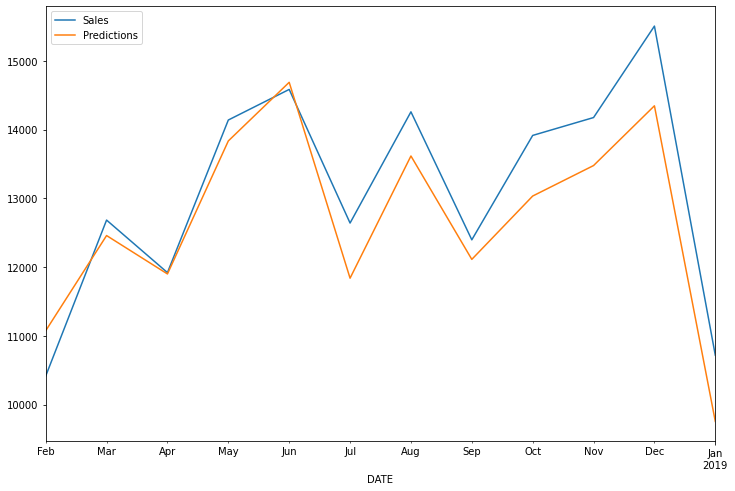

In [25]:
test.plot(figsize=(12,8))

## Saving and Loading Models

In [26]:
model.save('my_rnn_model.h5')
'''from keras.models import load_model
new_model = load_model('my_rnn_model.h5')'''

"from keras.models import load_model\nnew_model = load_model('my_rnn_model.h5')"

<a class="anchor" id="2."></a> 
# 2.Multivariate Time Series with RNN

Experimental data used to create regression models of appliances energy use in a low energy building. Data Set Information: The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for 10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters. Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis (rp5.ru), and merged together with the experimental data sets using the date and time column. Two random variables have been included in the data set for testing the regression models and to filter out non predictive attributes (parameters). 

## Data

Let's read in the data set:

In [27]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

df = pd.read_csv('../input/for-simple-exercises-time-series-forecasting/energydata_complete.csv',index_col='date', infer_datetime_format=True)
df.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19735 entries, 2016-01-11 17:00:00 to 2016-05-27 18:00:00
Data columns (total 28 columns):
Appliances     19735 non-null int64
lights         19735 non-null int64
T1             19735 non-null float64
RH_1           19735 non-null float64
T2             19735 non-null float64
RH_2           19735 non-null float64
T3             19735 non-null float64
RH_3           19735 non-null float64
T4             19735 non-null float64
RH_4           19735 non-null float64
T5             19735 non-null float64
RH_5           19735 non-null float64
T6             19735 non-null float64
RH_6           19735 non-null float64
T7             19735 non-null float64
RH_7           19735 non-null float64
T8             19735 non-null float64
RH_8           19735 non-null float64
T9             19735 non-null float64
RH_9           19735 non-null float64
T_out          19735 non-null float64
Press_mm_hg    19735 non-null float64
RH_out         19735 non-null fl

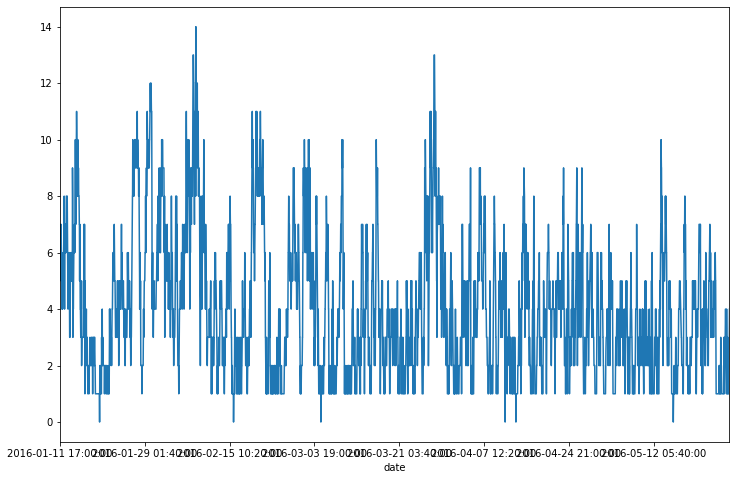

In [29]:
df['Windspeed'].plot(figsize=(12,8))

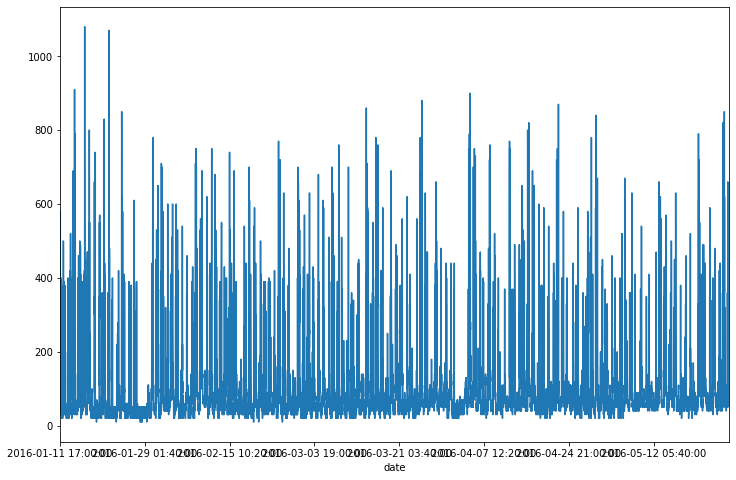

In [30]:
df['Appliances'].plot(figsize=(12,8))

## Train Test Split

In [31]:
df = df.loc['2016-05-01':]
df = df.round(2)

print('len(df)',len(df))
test_days = 2
test_ind = test_days*144 # 24*60/10 = 144
test_ind

len(df) 3853


288

In [32]:
train = df.iloc[:-test_ind]
test = df.iloc[-test_ind:]

## Scale Data

In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# IGNORE WARNING ITS JUST CONVERTING TO FLOATS
# WE ONLY FIT TO TRAININ DATA, OTHERWISE WE ARE CHEATING ASSUMING INFO ABOUT TEST SET
scaler.fit(train)



MinMaxScaler(copy=True, feature_range=(0, 1))

In [34]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

## Time Series Generator

This class takes in a sequence of data-points gathered at equal intervals, along with time series parameters such as stride, length of history, etc., to produce batches for training/validation.

In [35]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

# define generator
length = 144 # Length of the output sequences (in number of timesteps)
batch_size = 1 #Number of timeseries samples in each batch
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=batch_size)

In [36]:
print('len(scaled_train)',len(scaled_train))
print('len(generator) ',len(generator))

X,y = generator[0]

print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

len(scaled_train) 3565
len(generator)  3421
Given the Array: 
[0.03896104 0.         0.13798978 ... 0.14319527 0.75185111 0.75185111]
Predict this y: 
 [[0.03896104 0.         0.30834753 0.29439421 0.16038492 0.49182278
  0.0140056  0.36627907 0.24142857 0.24364791 0.12650602 0.36276002
  0.12       0.28205572 0.06169297 0.15759185 0.34582624 0.39585974
  0.09259259 0.39649608 0.18852459 0.96052632 0.59210526 0.1
  0.58333333 0.13609467 0.4576746  0.4576746 ]]


## Create the Model

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM

scaled_train.shape

(3565, 28)

In [38]:
# define model
model = Sequential()

# Simple RNN layer
model.add(LSTM(100,input_shape=(length,scaled_train.shape[1])))

# Final Prediction (one neuron per feature)
model.add(Dense(scaled_train.shape[1]))

model.compile(optimizer='adam', loss='mse')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               51600     
_________________________________________________________________
dense (Dense)                (None, 28)                2828      
Total params: 54,428
Trainable params: 54,428
Non-trainable params: 0
_________________________________________________________________


## EarlyStopping

In [39]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=1)
validation_generator = TimeseriesGenerator(scaled_test,scaled_test, 
                                           length=length, batch_size=batch_size)

model.fit_generator(generator,epochs=10,
                    validation_data=validation_generator,
                   callbacks=[early_stop])

Train for 3421 steps, validate for 144 steps
Epoch 1/10
3421/3421 [==============================] - 182s 53ms/step - loss: 0.0114 - val_loss: 0.0102
Epoch 2/10
3421/3421 [==============================] - 180s 52ms/step - loss: 0.0079 - val_loss: 0.0086
Epoch 3/10
3421/3421 [==============================] - 181s 53ms/step - loss: 0.0075 - val_loss: 0.0084
Epoch 4/10
2295/3421 [===================>..........] - ETA: 58s - loss: 0.0073

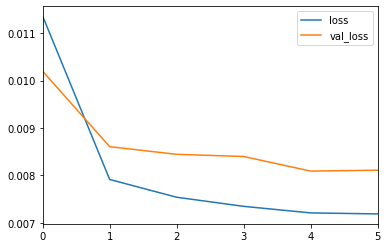

In [40]:
model.history.history.keys()

losses = pd.DataFrame(model.history.history)
losses.plot()

## Evaluate on Test Data

In [41]:
first_eval_batch = scaled_train[-length:]
first_eval_batch

array([[0.1038961 , 0.        , 0.72231687, ..., 0.53550296, 0.15909546,
        0.15909546],
       [0.11688312, 0.        , 0.73424191, ..., 0.52662722, 0.40344207,
        0.40344207],
       [0.11688312, 0.        , 0.73424191, ..., 0.51775148, 0.20452271,
        0.20452271],
       ...,
       [0.18181818, 0.        , 0.70017036, ..., 0.50118343, 0.33340004,
        0.33340004],
       [0.09090909, 0.        , 0.70017036, ..., 0.51952663, 0.78747248,
        0.78747248],
       [0.1038961 , 0.        , 0.70017036, ..., 0.53846154, 0.77286372,
        0.77286372]])

In [42]:
first_eval_batch = first_eval_batch.reshape((1, length, scaled_train.shape[1]))
model.predict(first_eval_batch)

array([[ 0.10138211,  0.06747055,  0.7054    ,  0.39806256,  0.54101586,
         0.43319184,  0.4200446 ,  0.4243666 ,  0.7039989 ,  0.40865916,
         0.30799067,  0.36109492,  0.6687389 , -0.00205898,  0.6135764 ,
         0.42317435,  0.5408545 ,  0.31506443,  0.49856254,  0.3375144 ,
         0.595571  ,  0.53723574,  0.4301601 ,  0.2183933 ,  0.5878991 ,
         0.5141734 ,  0.5099164 ,  0.5046277 ]], dtype=float32)

In [43]:
scaled_test[0]

array([0.19480519, 0.        , 0.70017036, 0.3920434 , 0.53007217,
       0.41064526, 0.40616246, 0.41913319, 0.72714286, 0.4115245 ,
       0.30722892, 0.36445121, 0.66777778, 0.        , 0.61119082,
       0.39840637, 0.51618399, 0.32953105, 0.53703704, 0.34024896,
       0.6057377 , 0.52631579, 0.41881579, 0.2       , 0.55283333,
       0.53372781, 0.76305783, 0.76305783])

In [44]:
n_features = scaled_train.shape[1]
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)
    

## Inverse Transformations and Compare

In [45]:
true_predictions = scaler.inverse_transform(test_predictions)

true_predictions = pd.DataFrame(data=true_predictions,columns=test.columns)
true_predictions

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,98.064228,2.024117,24.530698,38.026430,24.136468,35.028241,25.099118,36.799016,24.127992,37.726848,...,21.792238,37.170687,16.231932,756.348975,56.692168,2.183933,40.273945,7.289530,25.490524,25.226246
1,96.734742,3.032127,24.560496,38.274057,24.123634,35.222404,25.048282,36.755493,24.058670,37.757009,...,21.622522,37.031928,15.869359,756.849798,56.775843,2.407953,40.471935,7.040080,25.586063,25.403467
2,101.317128,3.654877,24.581933,38.452784,24.107274,35.395246,24.985945,36.732579,24.002120,37.867709,...,21.465738,36.952885,15.582083,757.277257,56.852014,2.604645,40.151536,6.775418,25.654022,25.435035
3,106.227594,4.050489,24.595472,38.626357,24.092135,35.530039,24.928159,36.740735,23.957546,38.006228,...,21.324414,36.896263,15.331191,757.600797,56.783116,2.784547,39.624751,6.533598,25.681746,25.425436
4,110.274562,4.314111,24.609931,38.815203,24.083941,35.676498,24.880185,36.794052,23.926576,38.167812,...,21.196967,36.871204,15.117654,757.861489,56.673563,2.955413,39.030169,6.320805,25.698157,25.427384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,-484.899577,-4.317026,29.404320,28.521855,40.072737,4.640982,24.975738,49.084687,29.042998,35.858090,...,22.889500,35.015266,61.924760,746.902323,-55.897916,2.311878,67.965786,-5.106754,28.442460,35.991550
284,-484.899210,-4.317057,29.404329,28.521845,40.072744,4.640980,24.975754,49.084730,29.043001,35.858127,...,22.889502,35.015282,61.924766,746.902294,-55.898088,2.311893,67.965593,-5.106823,28.442466,35.991547
285,-484.899210,-4.317084,29.404336,28.521823,40.072756,4.640956,24.975771,49.084766,29.043009,35.858155,...,22.889503,35.015291,61.924771,746.902270,-55.898215,2.311906,67.965450,-5.106887,28.442478,35.991550
286,-484.899119,-4.317111,29.404345,28.521802,40.072772,4.640944,24.975791,49.084796,29.043014,35.858183,...,22.889504,35.015297,61.924806,746.902253,-55.898351,2.311910,67.965364,-5.106938,28.442501,35.991532


<a class="anchor" id="3."></a> 
# 3.Use Facebook's Prophet Library for forecasting

In [46]:
import pandas as pd
from fbprophet import Prophet

## Load Data

The input to Prophet is always a dataframe with two columns: ds and y. The ds (datestamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp. The y column must be numeric, and represents the measurement we wish to forecast.

In [47]:
df = pd.read_csv('../input/for-simple-exercises-time-series-forecasting/Miles_Traveled.csv')
df.head()

,DATE,TRFVOLUSM227NFWA
0,1970-01-01,80173.0
1,1970-02-01,77442.0
2,1970-03-01,90223.0
3,1970-04-01,89956.0
4,1970-05-01,97972.0


In [48]:
df.columns = ['ds','y']
df['ds'] = pd.to_datetime(df['ds'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 2 columns):
ds    588 non-null datetime64[ns]
y     588 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 9.3 KB


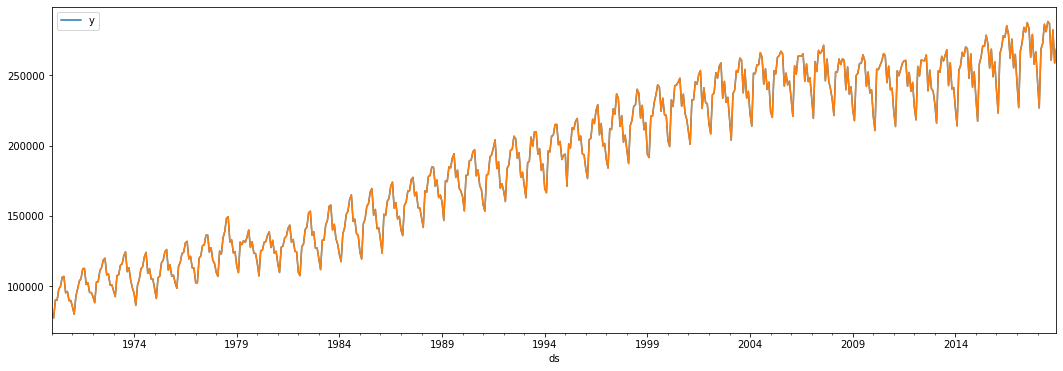

In [49]:
pd.plotting.register_matplotlib_converters()

try:
    df.plot(x='ds',y='y',figsize=(18,6))
except TypeError as e:
    figure_or_exception = str("TypeError: " + str(e))
else:
    figure_or_exception = df.set_index('ds').y.plot().get_figure()


In [50]:
print('len(df)',len(df))
print('len(df) - 12 = ',len(df) - 12)

len(df) 588
len(df) - 12 =  576


In [51]:
train = df.iloc[:576]
test = df.iloc[576:]

## Create and Fit Model

In [52]:
# This is fitting on all the data (no train test split in this example)
m = Prophet()
m.fit(train)

## Forecasting

**NOTE: Prophet by default is for daily data. You need to pass a frequency for sub-daily or monthly data. Info: https://facebook.github.io/prophet/docs/non-daily_data.html**

In [53]:
future = m.make_future_dataframe(periods=12,freq='MS')
forecast = m.predict(future)

In [54]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
583,2018-08-01,263410.800604,274535.269790,285644.123755,263342.030655,263476.981575,16448.013049,16448.013049,16448.013049,16448.013049,16448.013049,16448.013049,0.0,0.0,0.0,279858.813654
584,2018-09-01,263552.915940,256177.190765,267761.256896,263449.458400,263643.024845,-1670.418537,-1670.418537,-1670.418537,-1670.418537,-1670.418537,-1670.418537,0.0,0.0,0.0,261882.497404
585,2018-10-01,263690.446911,263051.398780,274886.109947,263541.695987,263825.135833,5305.505873,5305.505873,5305.505873,5305.505873,5305.505873,5305.505873,0.0,0.0,0.0,268995.952784
586,2018-11-01,263832.562247,249806.070474,261028.788020,263640.580642,264000.846531,-8208.986942,-8208.986942,-8208.986942,-8208.986942,-8208.986942,-8208.986942,0.0,0.0,0.0,255623.575305
587,2018-12-01,263970.093217,251087.538081,262731.050771,263724.773757,264186.916157,-6922.716937,-6922.716937,-6922.716937,-6922.716937,-6922.716937,-6922.716937,0.0,0.0,0.0,257047.376280


In [55]:
test.tail()

,ds,y
583,2018-08-01,286608.0
584,2018-09-01,260595.0
585,2018-10-01,282174.0
586,2018-11-01,258590.0
587,2018-12-01,268413.0


In [56]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [57]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)

,ds,yhat,yhat_lower,yhat_upper
576,2018-01-01,243850.453937,238143.777398,249480.190740
577,2018-02-01,235480.588794,229702.624041,241029.888771
578,2018-03-01,262683.274392,256372.318521,268163.016848
579,2018-04-01,262886.236399,257227.047581,269018.659587
580,2018-05-01,272609.522601,266952.781615,278452.756472
581,2018-06-01,272862.615300,267443.492047,278588.217647
582,2018-07-01,279321.841101,273416.105839,284843.281259
583,2018-08-01,279858.813654,274535.269790,285644.123755
584,2018-09-01,261882.497404,256177.190765,267761.256896
585,2018-10-01,268995.952784,263051.398780,274886.109947


### Plotting Forecast

We can use Prophet's own built in plotting tools

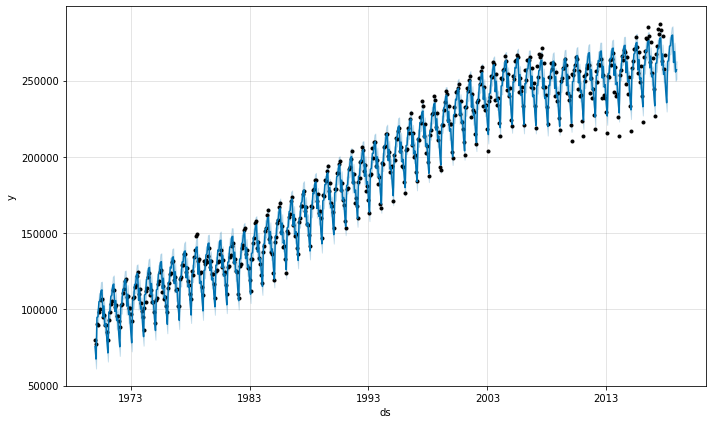

In [58]:
m.plot(forecast);

(731216.0, 732677.0)

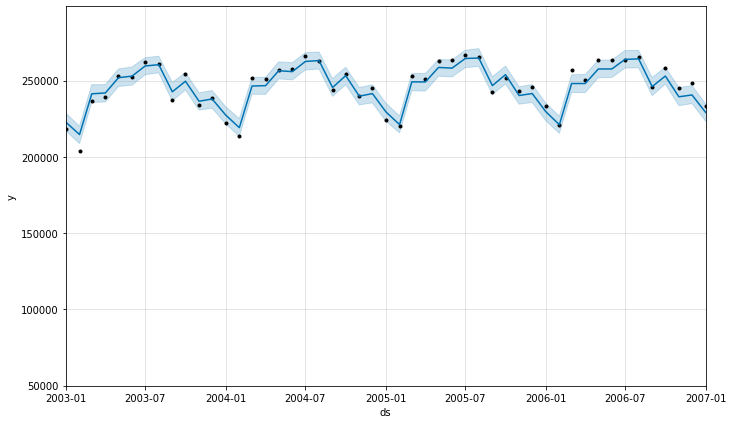

In [59]:
import matplotlib.pyplot as plt
%matplotlib inline
m.plot(forecast)
plt.xlim(pd.to_datetime('2003-01-01'),pd.to_datetime('2007-01-01'))

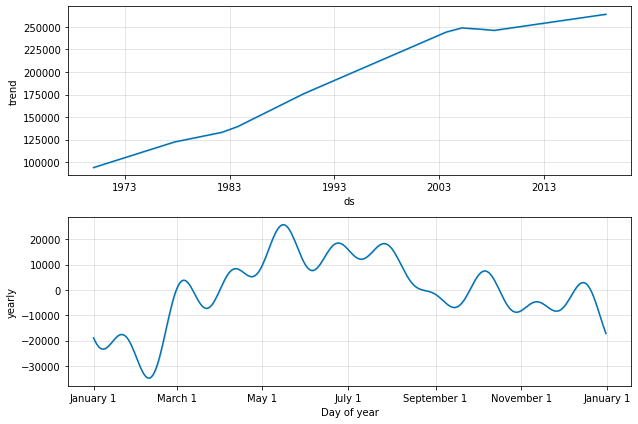

In [60]:
m.plot_components(forecast);

In [61]:
from statsmodels.tools.eval_measures import rmse
predictions = forecast.iloc[-12:]['yhat']
predictions

576    243850.453937
577    235480.588794
578    262683.274392
579    262886.236399
580    272609.522601
581    272862.615300
582    279321.841101
583    279858.813654
584    261882.497404
585    268995.952784
586    255623.575305
587    257047.376280
Name: yhat, dtype: float64

In [62]:
test['y']

576    245695.0
577    226660.0
578    268480.0
579    272475.0
580    286164.0
581    280877.0
582    288145.0
583    286608.0
584    260595.0
585    282174.0
586    258590.0
587    268413.0
Name: y, dtype: float64

In [63]:
rmse(predictions,test['y'])

8618.783155559411

In [64]:
test.mean()

y    268739.666667
dtype: float64

## Prophet Diagnostics

Prophet includes functionality for time series cross validation to measure forecast error using historical data. This is done by selecting cutoff points in the history, and for each of them fitting the model using data only up to that cutoff point. We can then compare the forecasted values to the actual values.

In [65]:
from fbprophet.diagnostics import cross_validation,performance_metrics
from fbprophet.plot import plot_cross_validation_metric

len(df)
len(df)/12

# Initial 5 years training period
initial = 5 * 365
initial = str(initial) + ' days'
# Fold every 5 years
period = 5 * 365
period = str(period) + ' days'
# Forecast 1 year into the future
horizon = 365
horizon = str(horizon) + ' days'

df_cv = cross_validation(m, initial=initial, period=period, horizon = horizon)

df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1977-01-01,108479.087306,107041.710385,109884.311419,102445.0,1976-12-11
1,1977-02-01,102996.111502,101502.260980,104430.450535,102416.0,1976-12-11
2,1977-03-01,118973.317944,117486.531273,120346.494171,119960.0,1976-12-11
3,1977-04-01,120612.923539,119090.079896,122015.351195,121513.0,1976-12-11
4,1977-05-01,127883.031663,126371.269290,129257.086719,128884.0,1976-12-11


In [66]:
df_cv.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
103,2017-08-01,273614.230765,268044.449825,279627.753972,283184.0,2016-12-01
104,2017-09-01,255737.189562,249987.360798,261551.567277,262673.0,2016-12-01
105,2017-10-01,262845.616157,257365.064845,268981.082903,278937.0,2016-12-01
106,2017-11-01,249500.895087,244208.004549,255508.082651,257712.0,2016-12-01
107,2017-12-01,250750.668713,244667.910999,256110.605457,266535.0,2016-12-01


In [67]:
performance_metrics(df_cv)

,horizon,mse,rmse,mae,mape,mdape,coverage
0,52 days,2.402227e+07,4901.251892,4506.384371,0.027631,0.023593,0.4
1,53 days,2.150811e+07,4637.683407,4238.662732,0.024863,0.023593,0.4
2,54 days,1.807689e+07,4251.692535,3708.943275,0.019933,0.022278,0.5
3,55 days,2.298205e+07,4793.960154,4236.275244,0.023042,0.023593,0.4
4,57 days,2.078937e+07,4559.535784,3972.087270,0.021317,0.022278,0.5
...,...,...,...,...,...,...,...
94,360 days,1.814608e+07,4259.821515,3750.359483,0.019596,0.019565,0.5
95,361 days,1.726110e+07,4154.647536,3473.037339,0.018212,0.018957,0.5
96,362 days,3.173990e+07,5633.817508,4404.300729,0.022034,0.024793,0.4
97,364 days,2.986513e+07,5464.900040,4229.869860,0.021378,0.021629,0.5


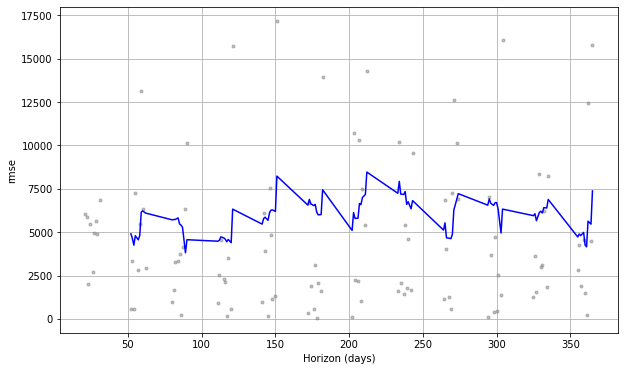

In [68]:
plot_cross_validation_metric(df_cv, metric='rmse');

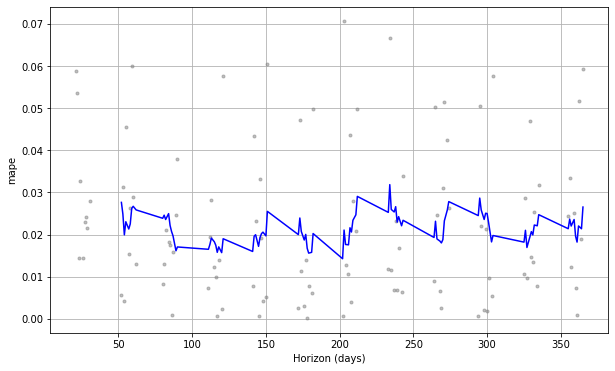

In [69]:
plot_cross_validation_metric(df_cv, metric='mape');